<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_4_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt


In [53]:
data = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [54]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [55]:
data.columns
# ida           : notation for a house
# date          : Date house was sold
# price         : Price is prediction target
# bedrooms      : Number of Bedrooms/House
# bathrooms     : Number of bathrooms/House
# sqft_living   : square footagsqft_lot: square footage of the lot
# floors        : Total floors (levels) in house
# waterfront    : House which has a view to a waterfront
# view          : Has been viewed
# condition     : How good the condition is ( Overall )
# grade         : overall grade given to the housing unit, based on King County grading system
# sqft_abovesquare: footage of house apart from basement
# sqft_basement : square footage of the basement
# yr_built      : Built Year
# yr_renovated  : Year when house was renovated
# zipcode       : zip
# lat           : Latitude coordinate
# long          : Longitude coordinate
# sqft_living15 : Living room area in 2015(implies-- some renovations) 
# sqft_lot15    : lotSize area in 2015(implies-- some renovations)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [57]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0.5, 1.0, 'Sqft vs Price')

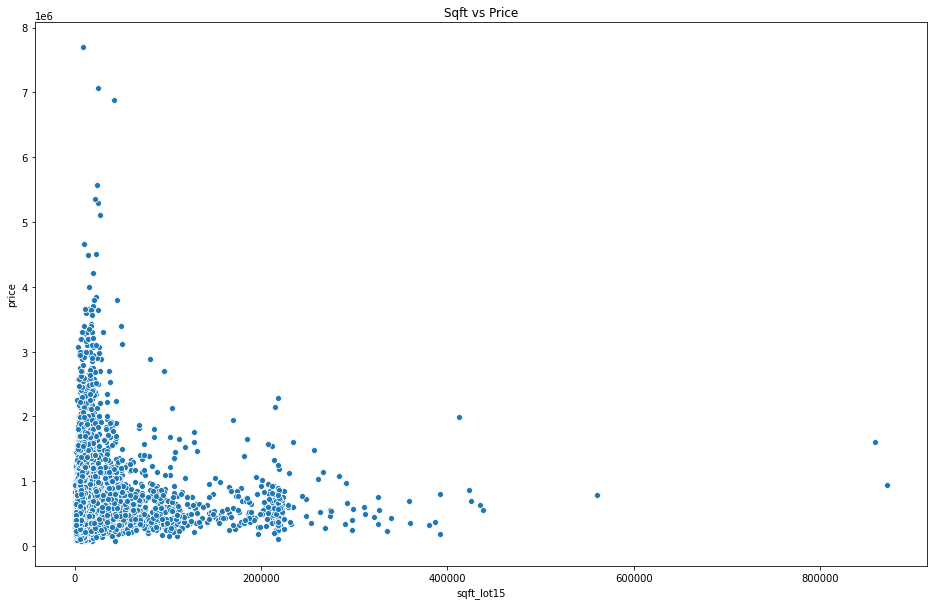

In [58]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="sqft_lot15", y="price", data=data)
plt.title("Sqft vs Price")

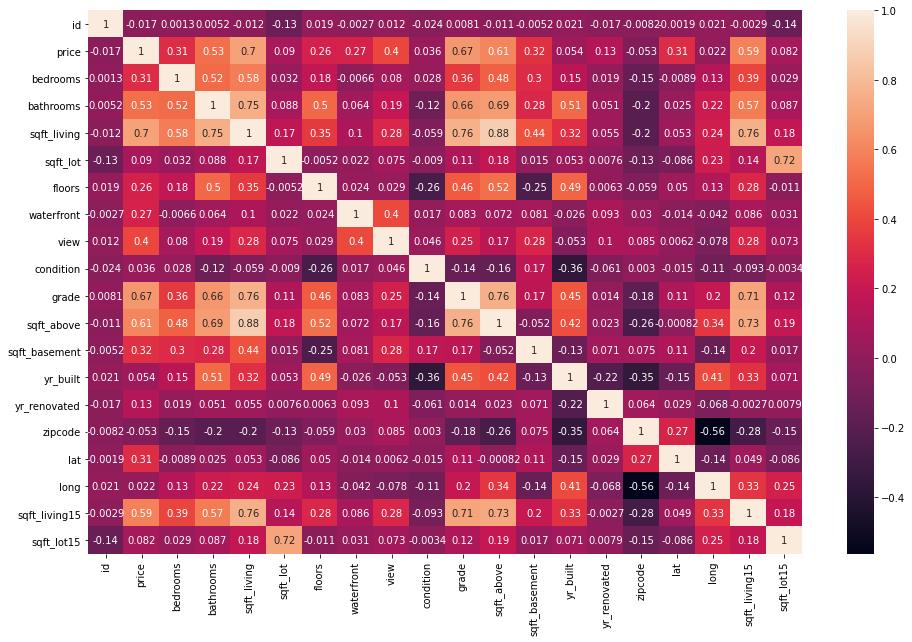

In [59]:
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3e2a81be0>,
      dtype=object)

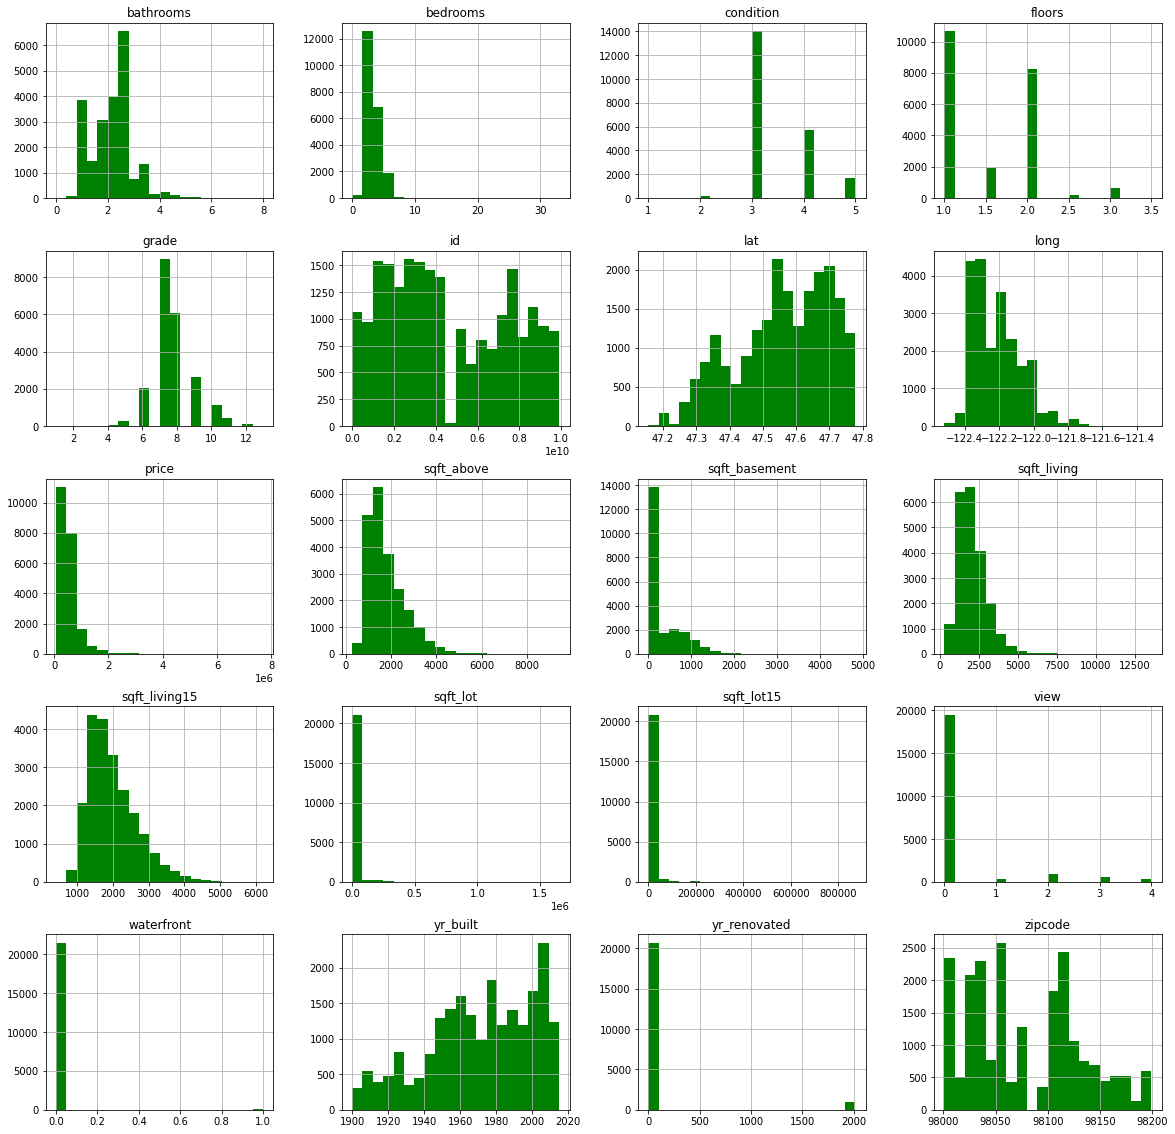

In [60]:
data.hist(bins=20, figsize=(20,20), color="g")

#Training And Split Data

In [61]:
data.columns
selected_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement"]
x_data = data[selected_features]
x_data.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [62]:
y_data = data[["price"]]
y_data.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [63]:
x_data.shape

(21613, 7)

In [64]:
y_data.shape

(21613, 1)

In [65]:
scaller = MinMaxScaler()
x_data = scaller.fit_transform(x_data)
x_data

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [66]:
x_data.shape

(21613, 7)

In [67]:
y_data = y_data.values.reshape(-1, 1)
y_data

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [68]:
y_data = scaller.fit_transform(y_data)
y_data

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [69]:
x_train, x_test, y_train,y_test = train_test_split(x_data, y_data, test_size=0.25)

In [70]:
x_train.shape

(16209, 7)

In [71]:
x_test.shape

(5404, 7)

In [72]:
y_train.shape

(16209, 1)

In [73]:
y_test.shape

(5404, 1)

In [74]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation="relu", input_shape=(7,)))
model.add(tf.keras.layers.Dense(units=100, activation="relu"))
model.add(tf.keras.layers.Dense(units=100, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer="Adam", loss="mean_squared_error" )

In [77]:
epochs_hist = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 9.9948e-04
Epoch 10/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - va

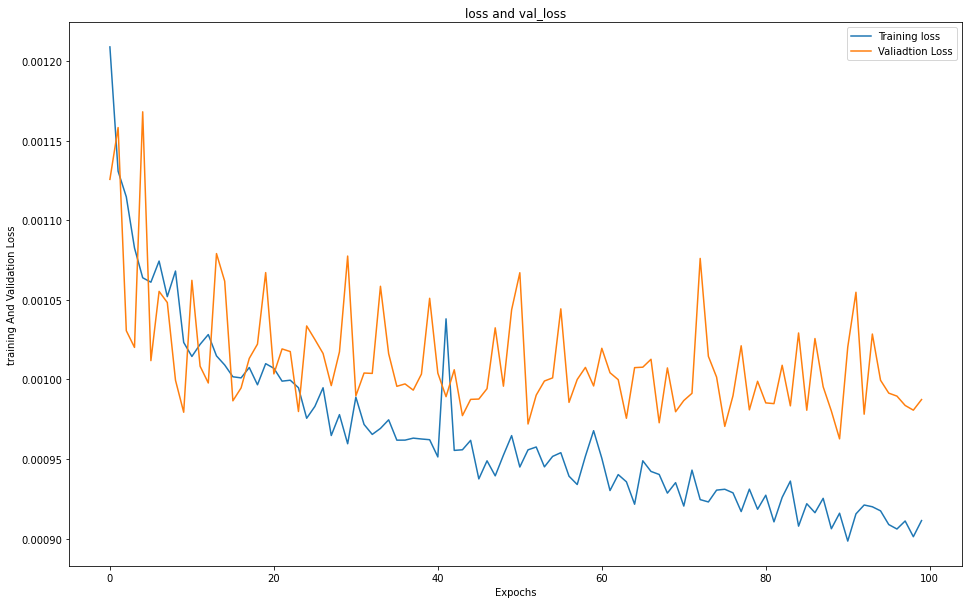

In [78]:
plt.figure(figsize=(16,10))
plt.title("loss and val_loss")
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])
plt.xlabel("Expochs")
plt.ylabel("training And Validation Loss")
plt.legend(["Training loss", "Valiadtion Loss"])

Text(0, 0.5, 'True Value')

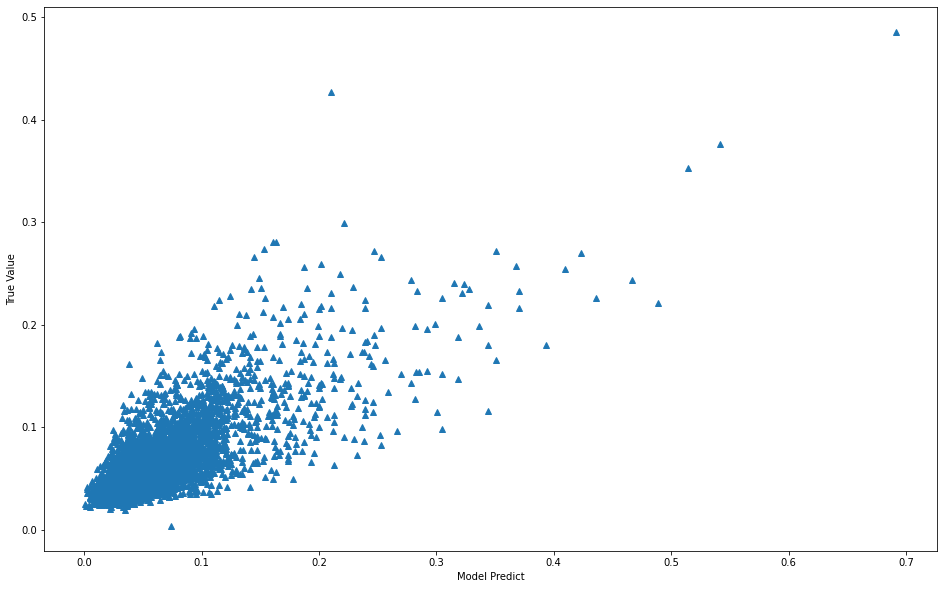

In [79]:
plt.figure(figsize=(16, 10))
y_predict = model.predict(x_test)
plt.plot(y_test, y_predict, "^")
plt.xlabel("Model Predict")
plt.ylabel('True Value')

#Manual Check

In [80]:
# "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement"
m_test_1 = np.array([[4,3,1960, 5000, 1, 2000, 3000]])

scaller_1 = MinMaxScaler()
m_test_1 = scaller_1.fit_transform(m_test_1)
prediction = model.predict(m_test_1)
# inverse predict value
prediction = scaller.inverse_transform(prediction)
prediction


array([[306799.34]], dtype=float32)

inverse Transform model predict data

In [81]:
y_predict_original = scaller.inverse_transform(y_predict)
y_test_original = scaller.inverse_transform(y_test)

(0.0, 3000000.0)

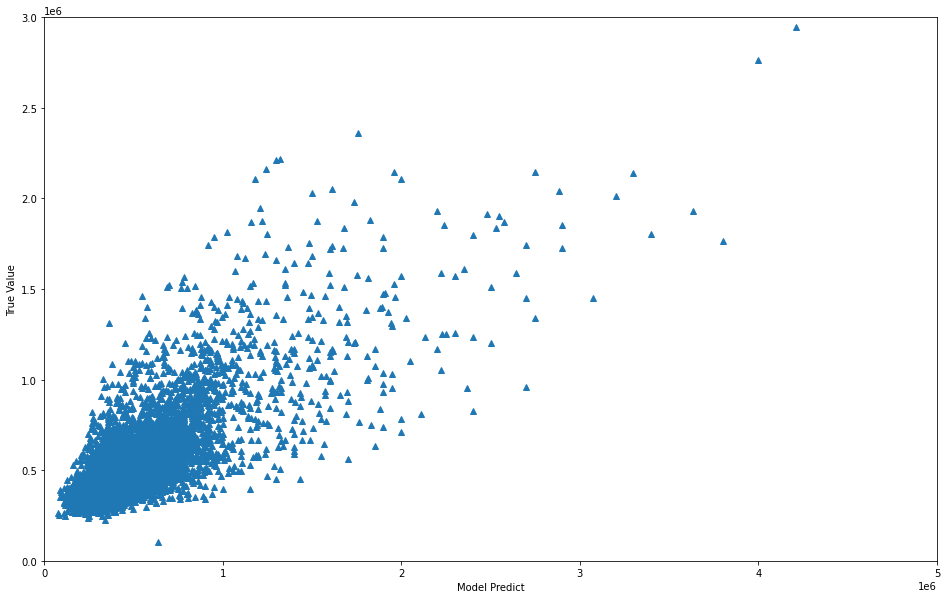

In [82]:
plt.figure(figsize=(16, 10))
plt.plot(y_test_original, y_predict_original, "^")
plt.xlabel("Model Predict")
plt.ylabel('True Value')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [83]:
n = len(x_test)
k = x_test.shape[1]
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)), "3f"))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2_scores = r2_score(y_test_original, y_predict_original)
adj_r2_score = 1-(1-r2_scores)*(n-1)/(n-k-1)


In [84]:
print("RMSE is          :- ", RMSE)
print("MSEE is          :- ", MSE)
print("MAE is           :- ", MAE)
print("r2_scores is     :- ", r2_scores)
print("adj_r2_score is  :- ", adj_r2_score)

RMSE is          :-  228004.852796
MSEE is          :-  51986212898.71003
MAE is           :-  155425.86863029702
r2_scores is     :-  0.5839346050249593
adj_r2_score is  :-  0.5833948611841837


# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES) AND RETRAIN THE EXACT SAME MODEL

In [85]:
selected_features_1 =  ['bedrooms','bathrooms','sqft_living',
                     'sqft_lot','floors', 'sqft_above', 'sqft_basement',
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
                    'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

selected_features_1 

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [86]:
x_data = data[selected_features_1]
x_data = scaller.fit_transform(x_data)
x_data

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [87]:
y_data = data["price"].values.reshape(-1,1)
y_data = scaller.fit_transform(y_data)
y_data

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

In [89]:
x_train.shape

(16209, 19)

In [90]:
x_test.shape

(5404, 19)

In [91]:
y_train.shape

(16209, 1)

In [92]:
y_test.shape

(5404, 1)

In [93]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(units=100, activation="relu", input_shape=(19,)))
model_1.add(tf.keras.layers.Dense(units=100, activation="relu"))
model_1.add(tf.keras.layers.Dense(units=100, activation="relu"))
model_1.add(tf.keras.layers.Dense(units=1, activation="linear"))    

In [43]:
model_1.compile(optimizer="Adam", loss="mean_squared_error")
epochos_hist_1 = model_1.fit(x_data, y_data, epochs=200, batch_size=50, validation_split=0.2)

Epoch 1/200
346/346 [==============================] - 1s 2ms/step - loss: 7.5401e-04 - val_loss: 5.8955e-04
Epoch 2/200
346/346 [==============================] - 1s 2ms/step - loss: 4.8223e-04 - val_loss: 5.0041e-04
Epoch 3/200
346/346 [==============================] - 1s 2ms/step - loss: 4.4354e-04 - val_loss: 5.2135e-04
Epoch 4/200
346/346 [==============================] - 1s 2ms/step - loss: 3.9113e-04 - val_loss: 4.0578e-04
Epoch 5/200
346/346 [==============================] - 1s 2ms/step - loss: 3.5807e-04 - val_loss: 5.1101e-04
Epoch 6/200
346/346 [==============================] - 1s 2ms/step - loss: 3.4266e-04 - val_loss: 4.0424e-04
Epoch 7/200
346/346 [==============================] - 1s 2ms/step - loss: 3.4297e-04 - val_loss: 4.0373e-04
Epoch 8/200
346/346 [==============================] - 1s 2ms/step - loss: 3.1191e-04 - val_loss: 3.9939e-04
Epoch 9/200
346/346 [==============================] - 1s 2ms/step - loss: 3.0144e-04 - val_loss: 4.2758e-04
Epoch 10/200
346/34

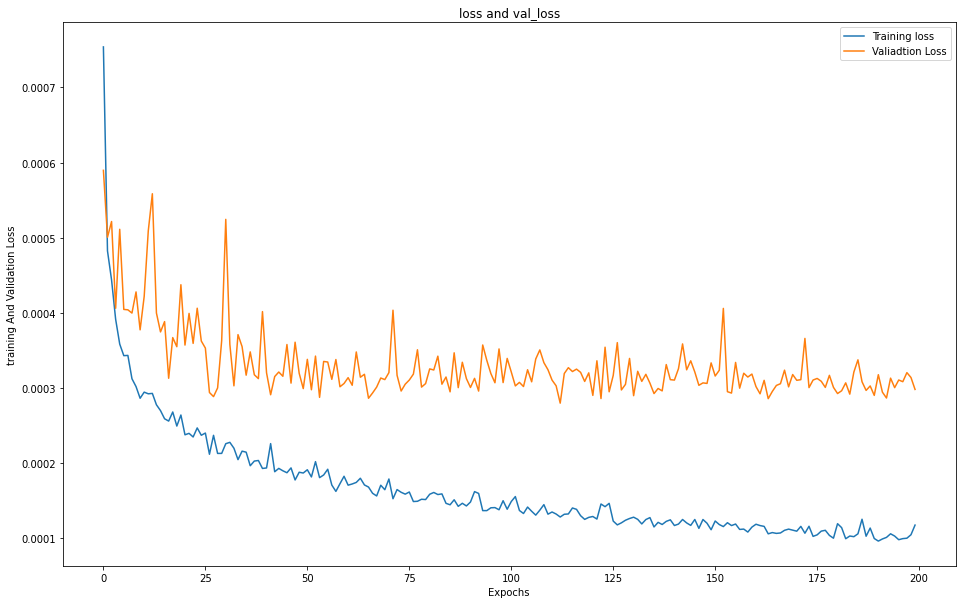

In [94]:
plt.figure(figsize=(16,10))
plt.title("loss and val_loss")
plt.plot(epochos_hist_1.history["loss"])
plt.plot(epochos_hist_1.history["val_loss"])
plt.xlabel("Expochs")
plt.ylabel("training And Validation Loss")
plt.legend(["Training loss", "Valiadtion Loss"])

#Manual Check

In [95]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'

In [96]:

m_test_2 = np.array([[3,1.00,1180,5650,1,0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650]])
print(len(m_test_2[0]))
scaller_2 = MinMaxScaler()
m_test_2 = scaller_2.fit_transform(m_test_2)
prediction = model_1.predict(m_test_2)
# inverse predict value
prediction = scaller.inverse_transform(prediction)
prediction


19


array([[75000.]], dtype=float32)

inverse Transform model predict data

In [97]:
y_predict_original = scaller.inverse_transform(y_predict)
y_test_original = scaller.inverse_transform(y_test)

(0.0, 3000000.0)

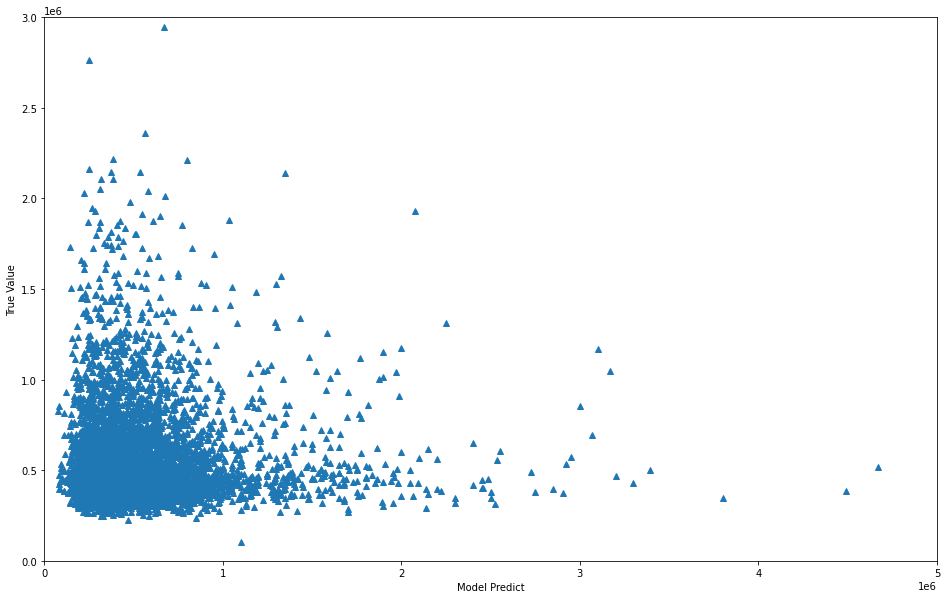

In [98]:
plt.figure(figsize=(16, 10))
plt.plot(y_test_original, y_predict_original, "^")
plt.xlabel("Model Predict")
plt.ylabel('True Value')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

Text(0, 0.5, 'True Value')

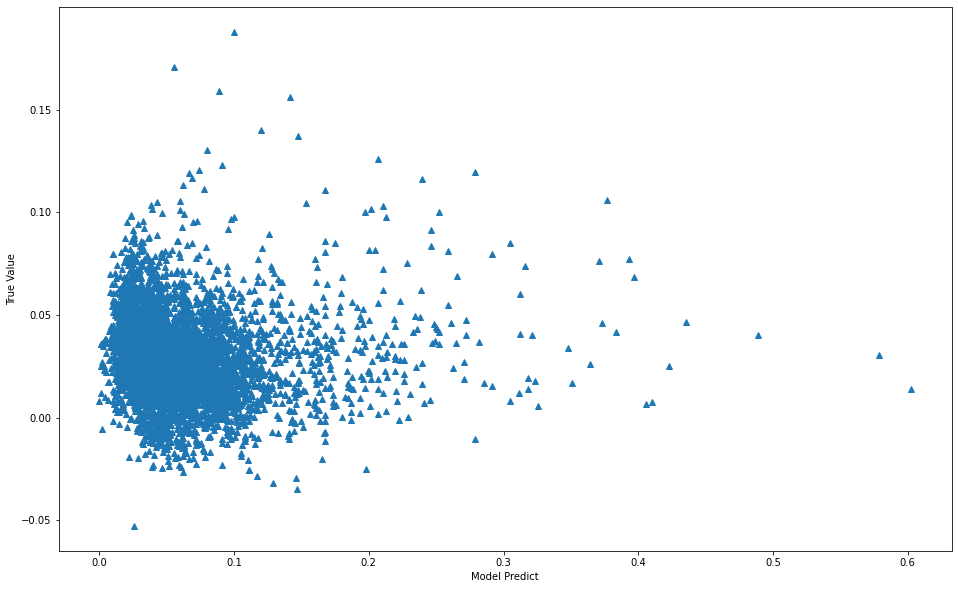

In [99]:
plt.figure(figsize=(16, 10))
y_predict = model_1.predict(x_test)
plt.plot(y_test, y_predict, "^")
plt.xlabel("Model Predict")
plt.ylabel('True Value')

In [100]:
n = len(x_test)
k = x_test.shape[1]
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)), "3f"))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2_scores = r2_score(y_test_original, y_predict_original)
adj_r2_score = 1-(1-r2_scores)*(n-1)/(n-k-1)


In [101]:
print("RMSE is          :- ", RMSE)
print("MSEE is          :- ", MSE)
print("MAE is           :- ", MAE)
print("r2_scores is     :- ", r2_scores)
print("adj_r2_score is  :- ", adj_r2_score)

RMSE is          :-  446957.046511
MSEE is          :-  199770601426.18964
MAE is           :-  298701.4440489684
r2_scores is     :-  -0.6142735585614987
adj_r2_score is  :-  -0.6199702891730641
